TODO
- include profile information such as household type in the custer analysis
- monitor how clusters evolve dynamically over the months
- include control group data. We do not actually know what are users not on the platform doing. Maybe they are saving much more…

In [12]:
import datetime
import pandas as pd
import numpy as np


In [13]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#import seaborn; 
#seaborn.set()

In [15]:
import pickle

In [16]:
base=pickle.load(open('./base_SHF.pck','rb'))
cons=pickle.load(open('./cons_SHF.pck','rb'))

## Import the baseline into a multicolumn DataFrame

In [17]:
# create a table by concatenating the baselines of all users
#basedf = [pd.concat([df],axis=1) for df in base['cons']]  <-- this creates a LIST non a Dataframe
baseline=pd.DataFrame()
i=0
for elem in base['cons']:
    print(i, end=" ")
    #baseline =pd.concat([baseline.reset_index(drop=True),elem.reset_index(drop=True)], axis=1)
    baseline=pd.concat([baseline,elem], axis=1)
    baseline.head()
    i=i+1
    #if baseline.isnull().sum().sum() >0 :
    #    print(i, "HELP!", base['user'][i])
    #i=i+1


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 

In [18]:
baseline=baseline.set_index(base['cons'][0].index)

In [181]:
# extract the usernames to create the coulmn names
id2pos = {'id':base['user'],'pos':range(0,len(base))}


In [20]:
# assign the column names
baseline.columns = [x[1] for x in id2pos['id']]

# remove NaN
baseline.dropna()


,plnkn,jrgnbld,thms.br,thms.br17,M.bs96,frnk-d.bck,mn-bnngl,ls-brndl,mrslv_bgl,fmly-dsslr,...,trlszl,nf,chrstn.vrnks,frschm,hnsjchm.rss,m.pncz87,thlnckls,thms,S.g.hsfrt,g.rmbchr
month,,,,,,,,,,,,,,,,,,,,,
2017-05-31,161.183,120.261,290.533,558.579,86.952,326.503,67.045,175.503,266.495,229.168,...,70.941,240.363,69.669,237.796,118.405,179.536,479.268,372.920,311.716,260.569
2017-06-30,160.538,109.593,234.448,474.183,85.268,274.655,70.824,128.569,255.198,206.279,...,71.534,205.754,53.653,198.010,91.974,182.574,483.791,325.121,298.277,225.446
2017-07-31,157.589,130.753,246.288,565.723,87.295,321.149,73.258,164.794,278.949,239.110,...,86.156,196.955,49.018,207.475,85.073,189.395,478.331,368.603,304.669,245.424
2017-08-31,183.923,111.789,273.124,425.683,95.169,221.417,106.746,165.531,282.516,173.234,...,77.976,190.805,52.716,221.348,118.899,182.408,527.774,371.768,316.033,240.830
2017-09-30,193.251,103.101,240.551,426.010,115.210,306.664,96.101,156.599,261.900,250.981,...,79.266,248.897,51.618,249.295,128.888,196.108,450.896,400.414,333.970,249.048
2017-10-31,237.438,176.473,308.280,517.392,126.714,356.438,99.884,173.105,267.671,275.781,...,92.816,283.152,64.880,281.267,114.416,207.285,439.198,471.172,372.760,260.142
2017-11-30,255.597,273.222,301.636,469.136,113.055,430.786,81.696,177.361,264.118,265.563,...,69.591,273.175,63.758,295.911,172.266,210.766,495.213,465.306,377.276,258.234
2017-12-31,292.304,221.115,358.509,466.856,139.336,435.592,111.201,189.260,303.975,293.648,...,95.775,290.655,76.740,304.484,189.742,188.263,536.128,499.904,433.240,228.980
2018-01-31,252.850,133.810,368.403,484.732,132.193,416.502,99.884,181.166,270.318,280.245,...,93.601,269.618,67.406,319.979,179.894,152.213,554.649,497.544,363.945,230.774


In [21]:
baseline_untildec=baseline.drop(baseline.index[8:])
baseline_jun_dec=baseline_untildec.drop(baseline_untildec.index[:1])

In [22]:
baseline_jun_dec

,plnkn,jrgnbld,thms.br,thms.br17,M.bs96,frnk-d.bck,mn-bnngl,ls-brndl,mrslv_bgl,fmly-dsslr,...,trlszl,nf,chrstn.vrnks,frschm,hnsjchm.rss,m.pncz87,thlnckls,thms,S.g.hsfrt,g.rmbchr
month,,,,,,,,,,,,,,,,,,,,,
2017-06-30,160.538,109.593,234.448,474.183,85.268,274.655,70.824,128.569,255.198,206.279,...,71.534,205.754,53.653,198.010,91.974,182.574,483.791,325.121,298.277,225.446
2017-07-31,157.589,130.753,246.288,565.723,87.295,321.149,73.258,164.794,278.949,239.110,...,86.156,196.955,49.018,207.475,85.073,189.395,478.331,368.603,304.669,245.424
2017-08-31,183.923,111.789,273.124,425.683,95.169,221.417,106.746,165.531,282.516,173.234,...,77.976,190.805,52.716,221.348,118.899,182.408,527.774,371.768,316.033,240.830
2017-09-30,193.251,103.101,240.551,426.010,115.210,306.664,96.101,156.599,261.900,250.981,...,79.266,248.897,51.618,249.295,128.888,196.108,450.896,400.414,333.970,249.048
2017-10-31,237.438,176.473,308.280,517.392,126.714,356.438,99.884,173.105,267.671,275.781,...,92.816,283.152,64.880,281.267,114.416,207.285,439.198,471.172,372.760,260.142
2017-11-30,255.597,273.222,301.636,469.136,113.055,430.786,81.696,177.361,264.118,265.563,...,69.591,273.175,63.758,295.911,172.266,210.766,495.213,465.306,377.276,258.234
2017-12-31,292.304,221.115,358.509,466.856,139.336,435.592,111.201,189.260,303.975,293.648,...,95.775,290.655,76.740,304.484,189.742,188.263,536.128,499.904,433.240,228.980


In [23]:
baseline.index[:1]

DatetimeIndex(['2017-05-31'], dtype='datetime64[ns]', name='month', freq='M')

In [24]:
#the folloiwng users have zero baseline values
for user in baseline.keys():
    for value in baseline[user]:
        if value==0:
            print(user,baseline[user])

## Import the consumption data into a multicolumn dataframe

In [25]:
# little routine to check the consumnption for a given user in a given period
#for i in range(len(cons['cons'][64]['2018-07-01':'2018-07-31']['consumption'])):
#    if (cons['cons'][64]['2018-07-01':'2018-07-31']['consumption'][i] > 1):
#        print(i , cons['cons'][64]['2018-07-01':'2018-07-31']['consumption'][i] )

In [26]:
cons['cons'][0].index

DatetimeIndex(['2018-06-03 00:00:00', '2018-06-03 01:00:00',
               '2018-06-03 02:00:00', '2018-06-03 03:00:00',
               '2018-06-03 04:00:00', '2018-06-03 05:00:00',
               '2018-06-03 06:00:00', '2018-06-03 07:00:00',
               '2018-06-03 08:00:00', '2018-06-03 09:00:00',
               ...
               '2018-12-30 21:45:00', '2018-12-30 22:00:00',
               '2018-12-30 22:15:00', '2018-12-30 22:30:00',
               '2018-12-30 22:45:00', '2018-12-30 23:00:00',
               '2018-12-30 23:15:00', '2018-12-30 23:30:00',
               '2018-12-30 23:45:00', '2018-12-31 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=20449, freq=None)

In [27]:
#consumption = [pd.concat([df],axis=1) for df in cons['cons']]
# resample data to hourly measurements hoping to even them out
consumption=pd.DataFrame()
index = cons['cons'][0].index
i=0
for elem in cons['cons']:
#for elem in cons['cons'][0:10]:
    temp=elem
    #temp.reindex(index,method='nearest')
    temp.reindex(index)
    temp = temp.resample('M').sum()
    if len(temp) < 6:
        print(temp)
        print(elem)
        print(i, "HELP!", cons['user'][i])
    consumption =pd.concat([consumption, temp], axis=1)
     #consumption =pd.concat([consumption,elem.resample('M').sum().reset_index(drop=True)], axis=1)
    #if consumption.isnull().sum().sum() >0 :
    #    print(i, "HELP!", base['user'][i])
    i=i+1

In [28]:
consumption.isnull().sum().sum() 

0

In [29]:
consumption.columns = [x[1] for x in id2pos['id']]
consumption

,plnkn,jrgnbld,thms.br,thms.br17,M.bs96,frnk-d.bck,mn-bnngl,ls-brndl,mrslv_bgl,fmly-dsslr,...,trlszl,nf,chrstn.vrnks,frschm,hnsjchm.rss,m.pncz87,thlnckls,thms,S.g.hsfrt,g.rmbchr
datetime,,,,,,,,,,,,,,,,,,,,,
2018-06-30,182.448,144.856,282.900,495.024,109.348,290.600,102.992,160.720,282.100,220.964,...,62.604,159.484,51.844,253.092,100.512,165.032,388.044,299.184,283.344,182.916
2018-07-31,184.428,203.588,294.480,436.668,108.056,309.144,108.604,166.704,302.660,223.760,...,118.948,139.460,55.392,263.316,106.372,157.900,431.216,276.304,342.408,184.112
2018-08-31,195.156,198.416,308.136,396.724,93.080,268.952,110.768,198.432,325.908,175.780,...,76.700,126.100,51.084,223.656,112.880,192.808,466.676,312.684,257.604,191.156
2018-09-30,174.720,115.108,233.712,420.556,110.956,338.484,77.168,164.844,266.892,232.580,...,63.992,159.068,50.292,289.136,116.592,198.448,386.412,318.444,291.528,190.008
2018-10-31,191.276,163.940,296.552,562.292,109.708,339.060,91.424,168.188,260.404,258.580,...,87.604,200.908,70.768,239.112,121.380,228.240,415.096,345.536,331.980,213.948
2018-11-30,224.352,139.648,308.504,582.396,112.144,382.128,82.236,161.388,300.828,284.892,...,91.552,253.712,53.760,252.520,153.600,188.536,497.688,386.856,399.736,213.952
2018-12-31,244.829,134.957,352.214,691.375,126.217,453.950,90.308,204.612,270.835,289.769,...,72.702,246.944,63.055,331.425,170.863,194.766,551.798,431.953,462.218,248.473


In [30]:
# this is to test the legth of the time series
#for elem in range(0,len(cons['cons'])):
#    print(cons['user'][elem], len(cons['cons'][elem].index))

In [31]:
#consumption=consumption.set_index(cons['cons'][0].index)
#consumption=consumption.set_index(cons['cons'][0].resample('M').sum().index)

## Import activity data

In [115]:
act=pickle.load(open('./activity_SHF.pck','rb'))

In [116]:
actions=pd.DataFrame()
for elem in act['activity']:
    actions =pd.concat([actions,elem], axis=1)

In [118]:
# extract the usernames to create the coulmn names
id2pos = {'id':act['user'],'pos':range(0,len(act))}



In [119]:
# assign the column names
actions.columns = [x[1] for x in id2pos['id']]

In [120]:
monthly_actions=actions.resample('M').sum()
monthly_actions

,plnkn,thms.br,thms.br17,M.bs96,frnk-d.bck,h.brkl,mn-bnngl,ls-brndl,mrslv_bgl,dllrts,...,trlszl,nf,chrstn.vrnks,frschm,hnsjchm.rss,m.pncz87,thlnckls,thms,Mchl-frnzl,g.rmbchr
week,,,,,,,,,,,,,,,,,,,,,
2018-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-30,76.0,0.0,0.0,81.0,2.0,70.0,1.0,0.0,83.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-31,101.0,0.0,0.0,108.0,0.0,3.0,149.0,0.0,62.0,5.0,...,142.0,340.0,157.0,7.0,34.0,90.0,176.0,0.0,0.0,165.0
2018-08-31,5.0,3.0,2.0,8.0,0.0,16.0,0.0,0.0,3.0,20.0,...,5.0,301.0,135.0,2.0,122.0,34.0,6.0,197.0,0.0,124.0
2018-09-30,1.0,4.0,173.0,3.0,1.0,7.0,0.0,0.0,1.0,4.0,...,3.0,323.0,423.0,8.0,5.0,0.0,11.0,330.0,184.0,398.0
2018-10-31,5.0,5.0,20.0,14.0,1.0,8.0,1.0,0.0,10.0,1.0,...,5.0,209.0,196.0,3.0,3.0,1.0,6.0,26.0,14.0,169.0
2018-11-30,10.0,34.0,10.0,12.0,1.0,6.0,1.0,81.0,0.0,5.0,...,2.0,186.0,175.0,1.0,0.0,5.0,1.0,24.0,0.0,24.0
2018-12-31,6.0,1.0,6.0,3.0,1.0,8.0,1.0,1.0,0.0,2.0,...,0.0,112.0,252.0,1.0,3.0,1.0,1.0,21.0,0.0,21.0
2019-01-31,1.0,0.0,3.0,3.0,0.0,3.0,1.0,0.0,0.0,0.0,...,3.0,80.0,131.0,0.0,0.0,0.0,0.0,11.0,0.0,35.0


In [121]:
log=pickle.load(open('./logins_SHF.pck','rb'))

In [122]:
logins=pd.DataFrame()
for elem in log['logins']:
    logins =pd.concat([logins,elem], axis=1)

In [123]:
# extract the usernames to create the coulmn names
id2pos = {'id':log['user'],'pos':range(0,len(log))}

# assign the column names
logins.columns = [x[1] for x in id2pos['id']]



In [124]:
monthly_logins=logins.resample('M').sum()
monthly_logins

,plnkn,thms.br,thms.br17,M.bs96,frnk-d.bck,h.brkl,mn-bnngl,ls-brndl,mrslv_bgl,dllrts,...,trlszl,nf,chrstn.vrnks,frschm,hnsjchm.rss,m.pncz87,thlnckls,thms,Mchl-frnzl,g.rmbchr
week,,,,,,,,,,,,,,,,,,,,,
2018-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-30,1050.0,0.0,0.0,1050.0,175.0,875.0,525.0,0.0,1400.0,175.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-31,1400.0,0.0,0.0,2450.0,0.0,700.0,700.0,0.0,1050.0,350.0,...,2450.0,19775.0,1575.0,1225.0,1400.0,875.0,175.0,0.0,0.0,6125.0
2018-08-31,175.0,875.0,175.0,1400.0,0.0,525.0,0.0,0.0,525.0,350.0,...,350.0,18900.0,1225.0,175.0,525.0,875.0,700.0,4025.0,0.0,19250.0
2018-09-30,525.0,350.0,1750.0,350.0,0.0,525.0,0.0,0.0,175.0,175.0,...,175.0,29225.0,5250.0,350.0,525.0,0.0,525.0,9275.0,4200.0,58800.0
2018-10-31,175.0,350.0,2275.0,350.0,0.0,525.0,0.0,0.0,525.0,0.0,...,350.0,16625.0,1925.0,175.0,175.0,0.0,175.0,6475.0,525.0,16100.0
2018-11-30,875.0,175.0,875.0,350.0,0.0,350.0,0.0,175.0,175.0,175.0,...,350.0,14000.0,2975.0,0.0,0.0,175.0,0.0,2275.0,0.0,7525.0
2018-12-31,700.0,0.0,350.0,525.0,0.0,1575.0,0.0,0.0,0.0,525.0,...,0.0,16450.0,7175.0,0.0,175.0,0.0,0.0,4375.0,0.0,1750.0
2019-01-31,350.0,0.0,175.0,175.0,0.0,175.0,0.0,0.0,0.0,0.0,...,350.0,9975.0,2975.0,0.0,0.0,0.0,0.0,2275.0,0.0,1750.0


# Data analysis

In [125]:
# from now on it should be similar to SES data analysis
#monthly=consumption.dropna()
consumption.fillna(0)
monthly=consumption

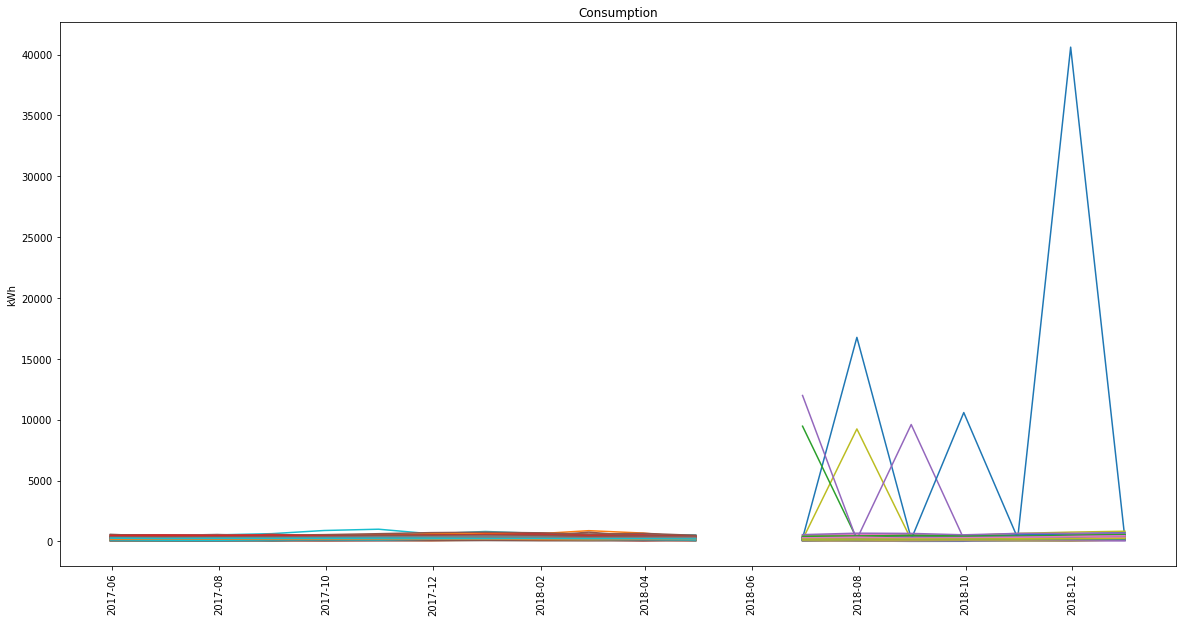

In [126]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.ylabel('kWh')
plt.title('Consumption') 
for i in monthly.columns:
    plt.plot(monthly[i])
    plt.plot(baseline[i])
plt.show()

#fig.savefig("/Users/aer/Desktop/shf.png")

### Group analysis

In [127]:
group_mean=monthly.mean(1)
print(group_mean)

datetime
2018-06-30    401.440661
2018-07-31    448.332817
2018-08-31    299.813165
2018-09-30    311.804487
2018-10-31    255.085217
2018-11-30    622.376765
2018-12-31    295.331661
Freq: M, dtype: float64


In [128]:
group_baseline_mean=baseline_jun_dec.mean(1)
group_baseline_mean.index=group_baseline_mean.index.shift(12)
print(group_baseline_mean)

month
2018-06-30    216.611652
2018-07-31    235.746696
2018-08-31    230.902539
2018-09-30    245.481583
2018-10-31    279.537070
2018-11-30    286.236835
2018-12-31    318.396165
Freq: M, dtype: float64


In [129]:
group_savings = (group_baseline_mean-group_mean )/group_baseline_mean
group_savings

month
2018-06-30   -0.853274
2018-07-31   -0.901757
2018-08-31   -0.298440
2018-09-30   -0.270175
2018-10-31    0.087473
2018-11-30   -1.174342
2018-12-31    0.072440
Freq: M, dtype: float64

### Individual analysis

In [130]:
row_mean = monthly.mean(0)
print(row_mean[0:5])

plnkn        199.601286
jrgnbld      157.216143
thms.br      296.642571
thms.br17    512.147857
M.bs96       109.929857
dtype: float64


In [131]:
row_mean_base=baseline_jun_dec.mean(0)
print(row_mean_base[0:5])

plnkn        211.520000
jrgnbld      160.863714
thms.br      280.405143
thms.br17    477.854714
M.bs96       108.863857
dtype: float64


In [132]:
#percentage savings per user
pctg = (row_mean_base-row_mean)/row_mean_base*100;

pctg[:5]

plnkn        5.634793
jrgnbld      2.267492
thms.br     -5.790703
thms.br17   -7.176479
M.bs96      -0.979205
dtype: float64

In [133]:
pctg.mean()

-59.81216369471566

In [134]:
#remove outliers
for user in pctg.keys():
    user_mean=pctg[user]
    if user_mean < -100:
        print(user, pctg[user])
        pctg=pctg.drop(user)

Brnsbn -1922.0136423093934
Brbr.rmlr -827.8328838946751
kh-schd -1031.3964588558263
hns.schmdr -318.0898743131301
chrstns-wnd -585.7235007092444
ntt.Schndr -105.2429759057706
Ndj.Sdl -1581.8827780115632
rchrt22 -824.4462756874756


In [135]:
s=pd.Series(pctg)
s.mean()

2.974108082194196

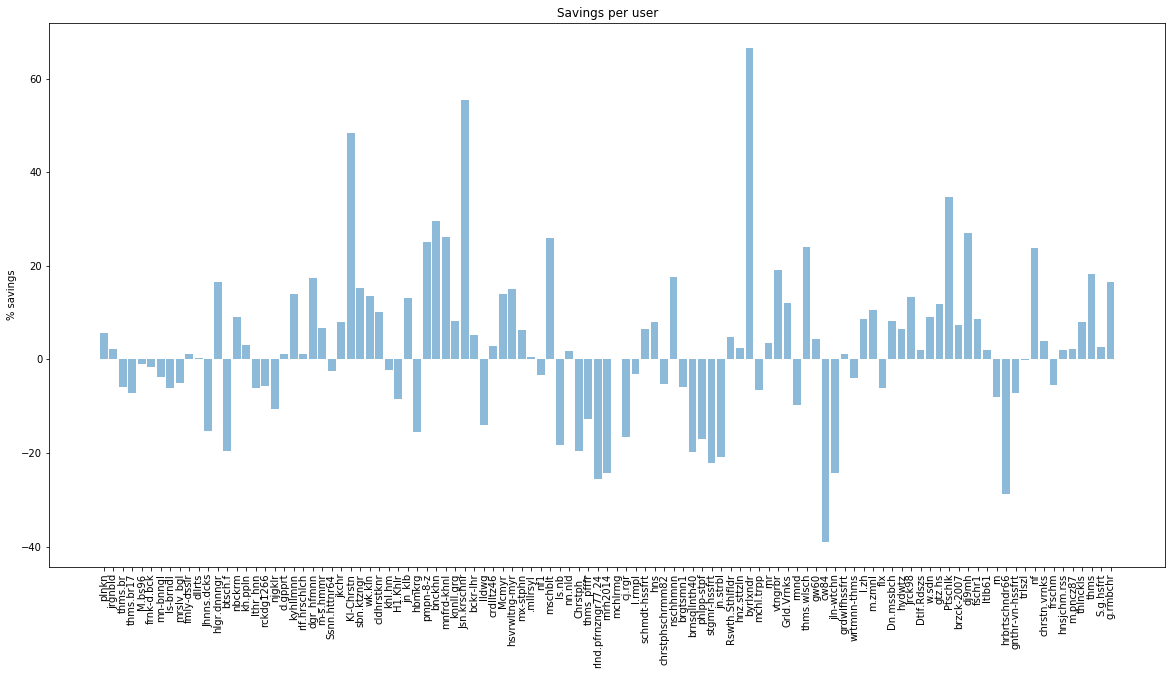

In [136]:
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(pctg.keys()))
plt.bar(y_pos, pctg, align='center', alpha=0.5)
plt.xticks(y_pos, pctg.keys())
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
plt.title('Savings per user') 
plt.show()
#fig.savefig("/Users/aer/Desktop/SHF_savings_per_user.png")

## Focussed analysis on September, October, November and December

In [137]:
cons_sept_dec=monthly[3:]
base_sept_dec=baseline_jun_dec[3:]
monthly_actions_sept_dec=monthly_actions[4:8]


In [138]:
mean_cons_sept_dec=cons_sept_dec.mean(0)
mean_base_sept_dec=base_sept_dec.mean(0)

In [139]:
pctg_sept_dec=(mean_base_sept_dec-mean_cons_sept_dec)/mean_base_sept_dec*100

In [176]:
s=pd.Series(pctg_sept_dec)
s.mean()

4.438463270815824

In [140]:
#remove outliers
#remove outliers
for user in pctg_sept_dec.keys():
    user_mean=pctg_sept_dec[user]
    if user_mean < -100:
        print(user, pctg_sept_dec[user])
        pctg_sept_dec=pctg_sept_dec.drop(user)

Brnsbn -2417.682294062841
rchrt22 -1317.6363956956184


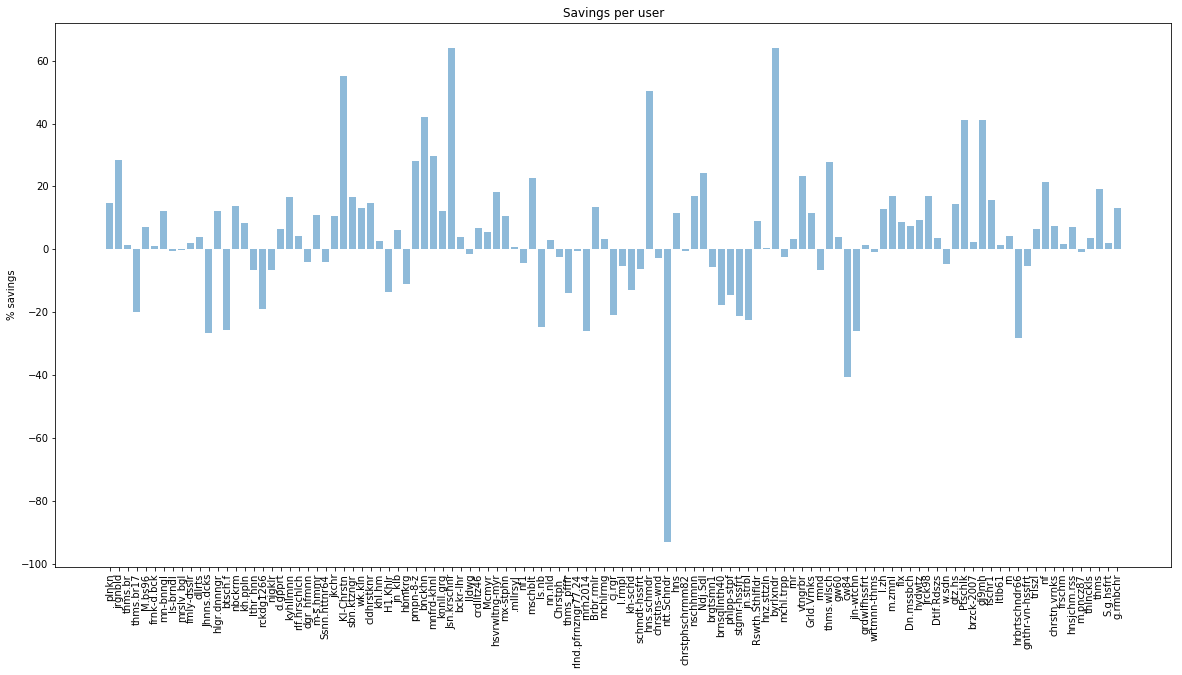

In [141]:
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(pctg_sept_dec.keys()))
plt.bar(y_pos, pctg_sept_dec, align='center', alpha=0.5)
plt.xticks(y_pos, pctg_sept_dec.keys())
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
plt.title('Savings per user') 
plt.show()

In [142]:
avg_actions=pd.Series(monthly_actions_sept_dec.mean(), index=monthly_actions_sept_dec.keys())
avg_actions.columns=['actions']
avg_actions[:10]

plnkn          5.50
thms.br       11.00
thms.br17     52.25
M.bs96         8.00
frnk-d.bck     1.00
h.brkl         7.25
mn-bnngl       0.75
ls-brndl      20.50
mrslv_bgl      2.75
dllrts         3.00
dtype: float64

In [143]:
action_quantiles=avg_actions.quantile([.1, .3, .5, .7])
action_quantiles.columns=['thresholds']
action_quantiles

0.1     0.675
0.3     2.275
0.5     6.375
0.7    15.000
dtype: float64

In [144]:
avg_actions.quantile(.1)

0.6750000000000003

In [145]:
#utenti con attività sotto il .7 quantile
threshold=avg_actions.quantile(.7)
inactive_users =[i for i in avg_actions.index if avg_actions[i] < threshold]
active_users = [x for x in pctg.index if x not in inactive_users]

In [146]:
active_cons.index

Index(['plnkn', 'jrgnbld', 'thms.br', 'thms.br17', 'M.bs96', 'frnk-d.bck',
       'mn-bnngl', 'ls-brndl', 'mrslv_bgl', 'fmly-dsslr',
       ...
       'trlszl', 'nf', 'chrstn.vrnks', 'frschm', 'hnsjchm.rss', 'm.pncz87',
       'thlnckls', 'thms', 'S.g.hsfrt', 'g.rmbchr'],
      dtype='object', length=107)

In [149]:
active_cons=pctg
for user in inactive_users:
    if user in active_cons.keys():
        active_cons=active_cons.drop(user)

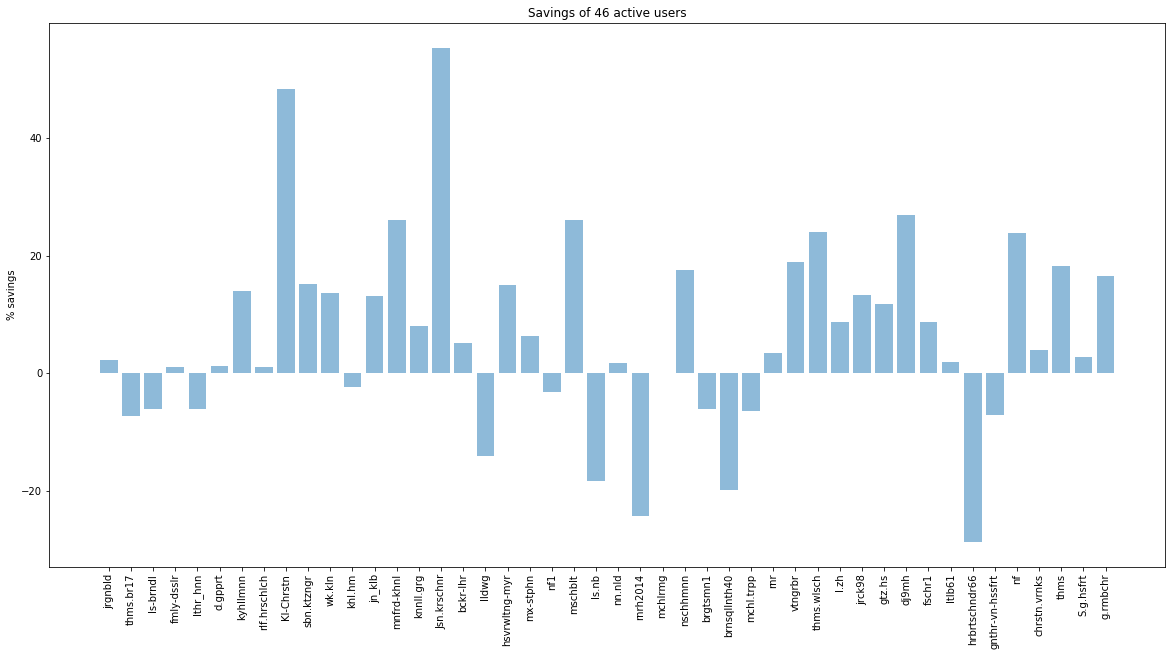

In [153]:
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(active_cons.keys()))
plt.bar(y_pos, active_cons, align='center', alpha=0.5)
plt.xticks(y_pos, active_cons.keys())
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
title = 'Savings of ' + str(len(active_cons.keys())) + ' active users' 
plt.title(title) 
plt.show()

In [154]:
s1=pd.Series(active_cons) 
s1.mean()

6.653582501349133

In [155]:
inactive_cons=pctg
inactive_cons=inactive_cons.drop(active_users)

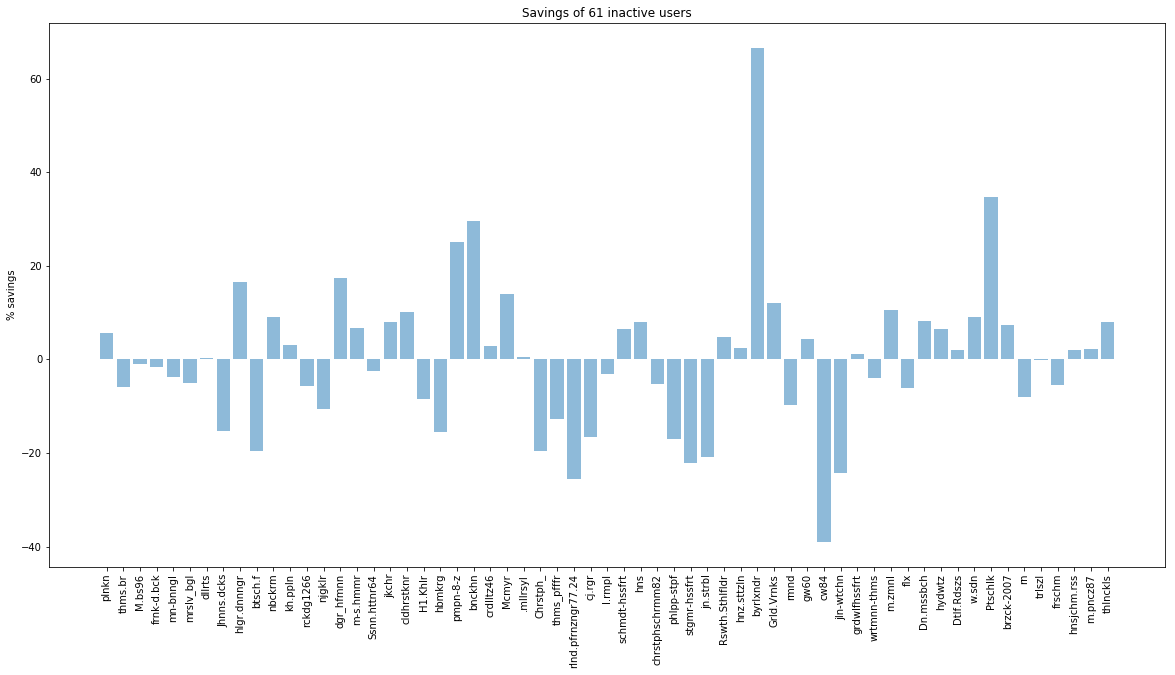

In [156]:
idx=inactive_cons.keys()
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(idx))
plt.bar(y_pos, inactive_cons, align='center', alpha=0.5)
plt.xticks(y_pos, idx)
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
title = 'Savings of ' + str(len(inactive_cons)) + ' inactive users' 
plt.title(title) 
plt.show()

In [157]:
s2=pd.Series(inactive_cons) 
s2.mean()

0.1994224546347372

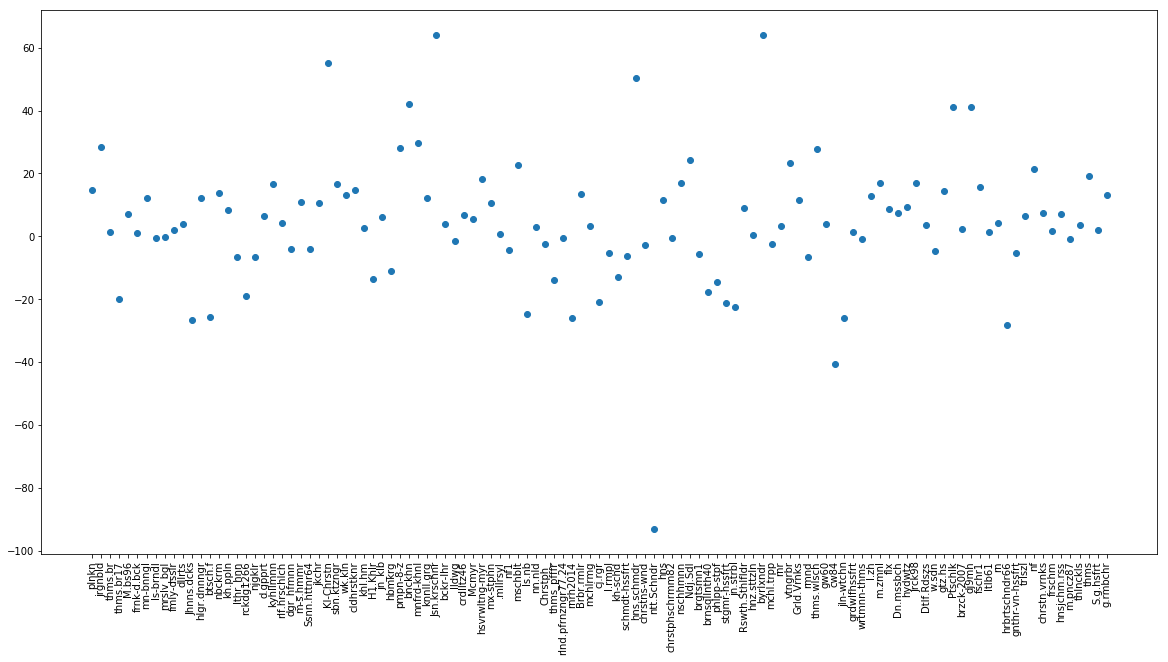

In [159]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.scatter(pctg_sept_dec.keys(), pctg_sept_dec)
#fig.savefig("/Users/aer/Desktop/savings_pre_cluster.png")

### Clustering with k-Means

In [162]:
#now let's try to cluster the users according to their consumption
from sklearn.cluster import KMeans


In [160]:
cons=pctg_sept_dec.values
cons=cons.reshape(-1,1)

In [163]:
kmeans = KMeans(n_clusters=6) 
kmeans.fit(cons)
y_kmeans = kmeans.predict(cons)

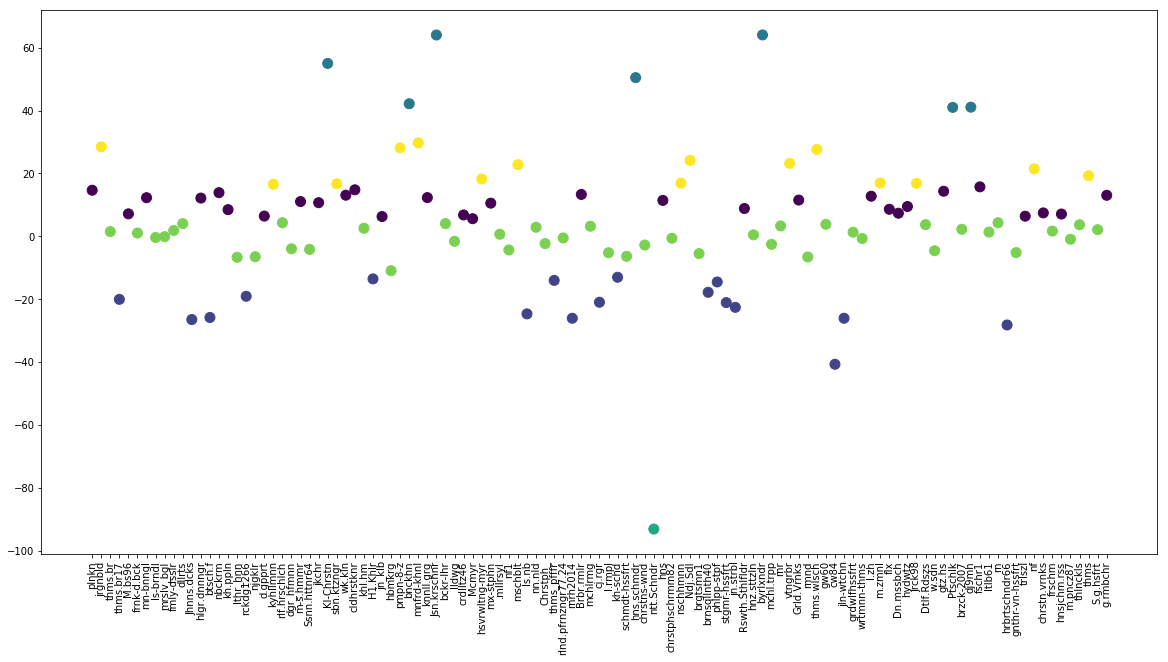

In [164]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.scatter(pctg_sept_dec.keys(), cons, c=y_kmeans, s=100, cmap='viridis')
#fig.savefig("/Users/aer/Desktop/clustered_savings.png")

In [166]:
clustering=pd.Series(y_kmeans, index=pctg_sept_dec.keys())
clustering[:10]


plnkn         0
jrgnbld       5
thms.br       4
thms.br17     1
M.bs96        0
frnk-d.bck    4
mn-bnngl      0
ls-brndl      4
mrslv_bgl     4
fmly-dsslr    4
dtype: int32

In [167]:
clustering_outcome = pd.concat([pctg_sept_dec,clustering],axis=1 )
clustering_outcome[:10]

,0,1
plnkn,14.655065,0
jrgnbld,28.460379,5
thms.br,1.488367,4
thms.br17,-20.071629,1
M.bs96,7.139172,0
frnk-d.bck,1.036823,4
mn-bnngl,12.277760,0
ls-brndl,-0.388755,4
mrslv_bgl,-0.117978,4
fmly-dsslr,1.855663,4


In [261]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('SHFanalysis.xlsx', engine='xlsxwriter')

In [262]:
clustering_outcome.columns=['consumption','cluster_id']
clustering_outcome.to_excel(writer, sheet_name='kmeans=6')

In [263]:
cluster_centers=pd.DataFrame(kmeans.cluster_centers_)
cluster_centers.columns=['cluster centres']
cluster_centers.to_excel(writer, sheet_name='cluster centres')



In [168]:
#create an array with consumption and activity
# but first create an index which includes only users for which we have both consumption and activity data
users=[]
for i in pctg_sept_dec.keys():
    if i in avg_actions.keys():
        users.append(i)
temp=[]
for i in users:
    temp.append([pctg_sept_dec[i],avg_actions[i] ])

X1=np.array(temp)



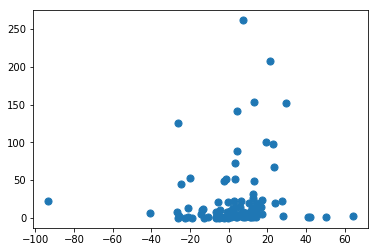

In [169]:
plt.scatter(X1[:, 0], X1[:, 1], s=50);

In [179]:
kmeans2 = KMeans(n_clusters=5) 
kmeans2.fit(X1)
y_kmeans2 = kmeans2.predict(X1)

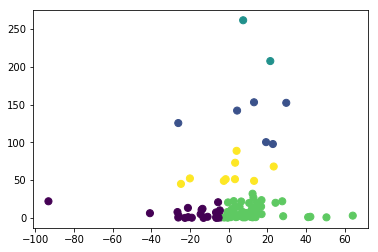

In [180]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans2, s=50, cmap='viridis')
fig.savefig("/Users/aer/Desktop/SHF_kmeans_2features.png")

### Quantiles analysis

In [244]:
quantiles=pd.DataFrame(cons, index=pctg_col_mean.keys())
quantiles[:10]

,0
plnkn,14.374191
jrgnbld,20.827442
thms.br,1.531589
thms.br17,-19.907961
M.bs96,6.833584
frnk-d.bck,0.394990
mn-bnngl,11.574621
ls-brndl,-0.382559
mrslv_bgl,-0.547012
fmly-dsslr,1.902824


In [245]:
quantiles[0][:10]

plnkn         14.374191
jrgnbld       20.827442
thms.br        1.531589
thms.br17    -19.907961
M.bs96         6.833584
frnk-d.bck     0.394990
mn-bnngl      11.574621
ls-brndl      -0.382559
mrslv_bgl     -0.547012
fmly-dsslr     1.902824
Name: 0, dtype: float64

In [246]:
thresholds=quantiles.quantile([.1, .3, .4,.6,.8,.9])
thresholds.columns=['savings']
thresholds

,savings
0.1,-19.211814
0.3,-2.275986
0.4,1.283037
0.6,6.817403
0.8,14.462656
0.9,22.419744


In [247]:
A =quantiles[quantiles[0] < quantiles[0].quantile(.1)] #increase_more_19
B=quantiles[(quantiles[0] > quantiles[0].quantile(.1)) & (quantiles[0] <= quantiles[0].quantile(.3) )] #increase_between_19_and_2
C=quantiles[(quantiles[0] > quantiles[0].quantile(.3)) & (quantiles[0] <= quantiles[0].quantile(.5) )] #stable_between_2_and_minus4
D=quantiles[(quantiles[0] > quantiles[0].quantile(.5)) & (quantiles[0] <= quantiles[0].quantile(.7) )] #savers > 3 < 11%
E=quantiles[quantiles[0] > quantiles[0].quantile(.7)] #supersavers >11



In [248]:
# Write each dataframe to a different worksheet.
thresholds.to_excel(writer, sheet_name='thresholds')

A.to_excel(writer, sheet_name='much worse')
B.to_excel(writer, sheet_name='rather worse')
C.to_excel(writer, sheet_name='stable')
D.to_excel(writer, sheet_name='rather better')
E.to_excel(writer, sheet_name='much better')



### Classification based on thresholds

1. users who increased consumption: worse
2. rather stable consumption, no change: -3 to 2% —> for this one we prepared an additional letter : stable
3. savings until 10%: mild_savers
4. savings 10-20%:  savers 
5. supersavers over 20%: supersavers

In [249]:
#worse=pd.Series()
#stable=pd.Series()
#mild_savers=pd.Series()
#savers=pd.Series()
#supersavers=pd.Series()

In [250]:
worse=[]
worseidx=[]

stable=[]
stableidx=[]

mild_savers=[]
mild_saversidx=[]

savers=[]
saversidx=[]

supersavers=[]
supersaversidx=[]

In [251]:
for elem in pctg_col_mean.keys():
    if pctg_col_mean[elem] <-3:
        worse.append(pctg_col_mean[elem] )
        worseidx.append(elem)
    elif (pctg_col_mean[elem] >=-3) and (pctg_col_mean[elem] <2):
        stable.append(pctg_col_mean[elem] )
        stableidx.append(elem)
    elif (pctg_col_mean[elem] >=2) and (pctg_col_mean[elem] <10):
        mild_savers.append(pctg_col_mean[elem] )
        mild_saversidx.append(elem)
    elif (pctg_col_mean[elem] >=10) and (pctg_col_mean[elem] <20):
        savers.append(pctg_col_mean[elem] )
        saversidx.append(elem)
    elif (pctg_col_mean[elem] >=20):
        supersavers.append(pctg_col_mean[elem] )
        supersaversidx.append(elem)
      

In [252]:
worse_s=pd.Series(worse)
worse_s.index=worseidx

stable_s=pd.Series(stable)
stable_s.index=stableidx

mild_savers_s=pd.Series(mild_savers)
mild_savers_s.index=mild_saversidx

savers_s=pd.Series(savers)
savers_s.index=saversidx

supersavers_s=pd.Series(supersavers)
supersavers_s.index=supersaversidx


In [253]:
worse_s.to_excel(writer, sheet_name='worse <-3')
stable_s.to_excel(writer, sheet_name='-3 <=stable < 2')
mild_savers_s.to_excel(writer, sheet_name='2 <=mild_savers < 10')
savers_s.to_excel(writer, sheet_name='10 <=savers < 20')
supersavers_s.to_excel(writer, sheet_name='supersavers >= 10')






In [264]:

writer.save()

## Analysis of individual users

In [149]:
shifted_baseline_jun_dec=baseline_jun_dec
shifted_baseline_jun_dec.index=consumption.index

In [150]:
savings=(consumption-shifted_baseline_jun_dec)


In [151]:
savings

,plnkn,jrgnbld,thms.br,thms.br17,M.bs96,frnk-d.bck,mn-bnngl,ls-brndl,mrslv_bgl,fmly-dsslr,...,trlszl,nf,chrstn.vrnks,frschm,hnsjchm.rss,m.pncz87,thlnckls,thms,S.g.hsfrt,g.rmbchr
datetime,,,,,,,,,,,,,,,,,,,,,
2018-06-30,21.910,35.263,48.452,20.841,24.080,15.945,32.168,32.151,26.902,14.685,...,-8.930,-46.270,-1.809,55.082,8.538,-17.542,-95.747,-25.937,-14.933,-42.530
2018-07-31,26.839,72.835,48.192,-129.055,20.761,-12.005,35.346,1.910,23.711,-15.350,...,32.792,-57.495,6.374,55.841,21.299,-31.495,-47.115,-92.299,37.739,-61.312
2018-08-31,11.233,86.627,35.012,-28.959,-2.089,47.535,4.022,32.901,43.392,2.546,...,-1.276,-64.705,-1.632,2.308,-6.019,10.400,-61.098,-59.084,-58.429,-49.674
2018-09-30,-18.531,12.007,-6.839,-5.454,-4.254,31.820,-18.933,8.245,4.992,-18.401,...,-15.274,-89.829,-1.326,39.841,-12.296,2.340,-64.484,-81.970,-42.442,-59.040
2018-10-31,-46.162,-12.533,-11.728,44.900,-17.006,-17.378,-8.460,-4.917,-7.267,-17.201,...,-5.212,-82.244,5.888,-42.155,6.964,20.955,-24.102,-125.636,-40.780,-46.194
2018-11-30,-31.245,-133.574,6.868,113.260,-0.911,-48.658,0.540,-15.973,36.710,19.329,...,21.961,-19.463,-9.998,-43.391,-18.666,-22.230,2.475,-78.450,22.460,-44.282
2018-12-31,-47.475,-86.158,-6.295,224.519,-13.119,18.358,-20.893,15.352,-33.140,-3.879,...,-23.073,-43.711,-13.685,26.941,-18.879,6.503,15.670,-67.951,28.978,19.493


In [161]:
percentage_of_saving=savings/shifted_baseline_jun_dec
percentage_of_saving

,plnkn,jrgnbld,thms.br,thms.br17,M.bs96,frnk-d.bck,mn-bnngl,ls-brndl,mrslv_bgl,fmly-dsslr,...,trlszl,nf,chrstn.vrnks,frschm,hnsjchm.rss,m.pncz87,thlnckls,thms,S.g.hsfrt,g.rmbchr
datetime,,,,,,,,,,,,,,,,,,,,,
2018-06-30,0.1364785907386413185663207465,0.3217632513025466955006250399,0.2066641643349484747150754112,0.04395138585735886777889548972,0.2824037153445606792700661444,0.05805465037956709326245653638,0.4541963176324409804586016040,0.2500680568410736647247781347,0.1054161866472307776706714002,0.07118999025591553187673005977,...,-0.1248357424441524310118265440,-0.2248801967397960671481477881,-0.03371666076454252325126274393,0.2781778698045553254886116863,0.09283058255593972209537477983,-0.09608158883521202361782071927,-0.1979098412330944560771076767,-0.07977645245923825283509831724,-0.05006420206720598638178605793,-0.1886482794105905627068122743
2018-07-31,0.1703101104772541230669653339,0.5570426682370576583328871995,0.1956733580198791658546092380,-0.2281240112210392718698020056,0.2378257632166790766939687267,-0.03738140240200031760958309071,0.4824865543694886565289797701,0.01159022779955580907071859412,0.08500120093637188159842838655,-0.06419639496466061645267868345,...,0.3806119132735967315102836715,-0.2919194739915209057906628418,0.1300338651107756334407768575,0.2691456802024340281961682130,0.2503614542804415031796222068,-0.1662926687610549380923466829,-0.09849873832137160250955928008,-0.2504021942306492350849016421,0.1238688543960823057153829238,-0.2498207184301453810548275637
2018-08-31,0.06107447138204574740516411759,0.7749152421078997039064666470,0.1281908583646988181192425418,-0.06802949612739996664184381335,-0.02195042503336170391619119671,0.2146854125925290289363508674,0.03767822681880351488580368351,0.1987603530456530800877177085,0.1535913010236588370216200144,0.01469688398351362896429107450,...,-0.01636400943880168256899558839,-0.3391158512617593878567123503,-0.03095834281811973594354655133,0.01042701989627193378752010409,-0.05062279750039949873421980000,0.05701504319985965527827726854,-0.1157654602159257561001489274,-0.1589270727980891308558025435,-0.1848825913749513500172450345,-0.2062616783623302744674666777
2018-09-30,-0.09589083626992874551748761973,0.1164586182481256243877362974,-0.02843056150255039471879144132,-0.01280251637285509729818548860,-0.03692387813557850880999913202,0.1037617718414942738632509848,-0.1970114775080384179144858014,0.05265040006641166290972483860,0.01906071019473081328751431844,-0.07331630681206943951932616413,...,-0.1926929578886281633991875457,-0.3609083275411113834236652109,-0.02568871323956759270022085319,0.1598146773902404781483784272,-0.09540065793557196946185835764,0.01193220062414587880147673731,-0.1430130229587310599339980838,-0.2047131219188140274815565889,-0.1270832709524807617450669222,-0.2370627348944781728823359352
2018-10-31,-0.1944170688769278716970324885,-0.07101936273537594986201855241,-0.03804333722589853380044115739,0.08678139592417354732968426261,-0.1342077434221948640244961093,-0.04875462212222041420948383730,-0.08469824996996515958511873774,-0.02840472545564830594148060426,-0.02714900007845452066155840565,-0.06237195455814577508965447221,...,-0.05615411136011032580589553525,-0.2904588348307622760919929932,0.09075215782983970406905055487,-0.1498753853100434818162102202,0.06086561320095091595581037617,0.1010926984586438960851002243,-0.05487729907695390234017459096,-0.2666457259769256237637211040,-0.1094001502307114497263654899,-0.1775722490024678829254791614
2018-11-30,-0.1222432188171222666932710478,-0.4888844968560364831528939836,0.02276916548422602076675197921,0.2414225299273558200607073429,-0.008058024855158993410287028437,-0.1129516743812473014443366312,0.006609870740305522914218566392,-0.09005925767220527624449568958,0.1389909055800816301804496475,0.07278498887269687418804577445,...,0.3155724159733298846115158569,-0.07124736890271803788780086025,-0.1568116942187647040371404373,-0.1466353058858913659850428000,-0.1083556824910313120406812720,-0.1054724196502282

In [152]:
savings.keys()

Index(['plnkn', 'jrgnbld', 'thms.br', 'thms.br17', 'M.bs96', 'frnk-d.bck',
       'mn-bnngl', 'ls-brndl', 'mrslv_bgl', 'fmly-dsslr',
       ...
       'trlszl', 'nf', 'chrstn.vrnks', 'frschm', 'hnsjchm.rss', 'm.pncz87',
       'thlnckls', 'thms', 'S.g.hsfrt', 'g.rmbchr'],
      dtype='object', length=115)

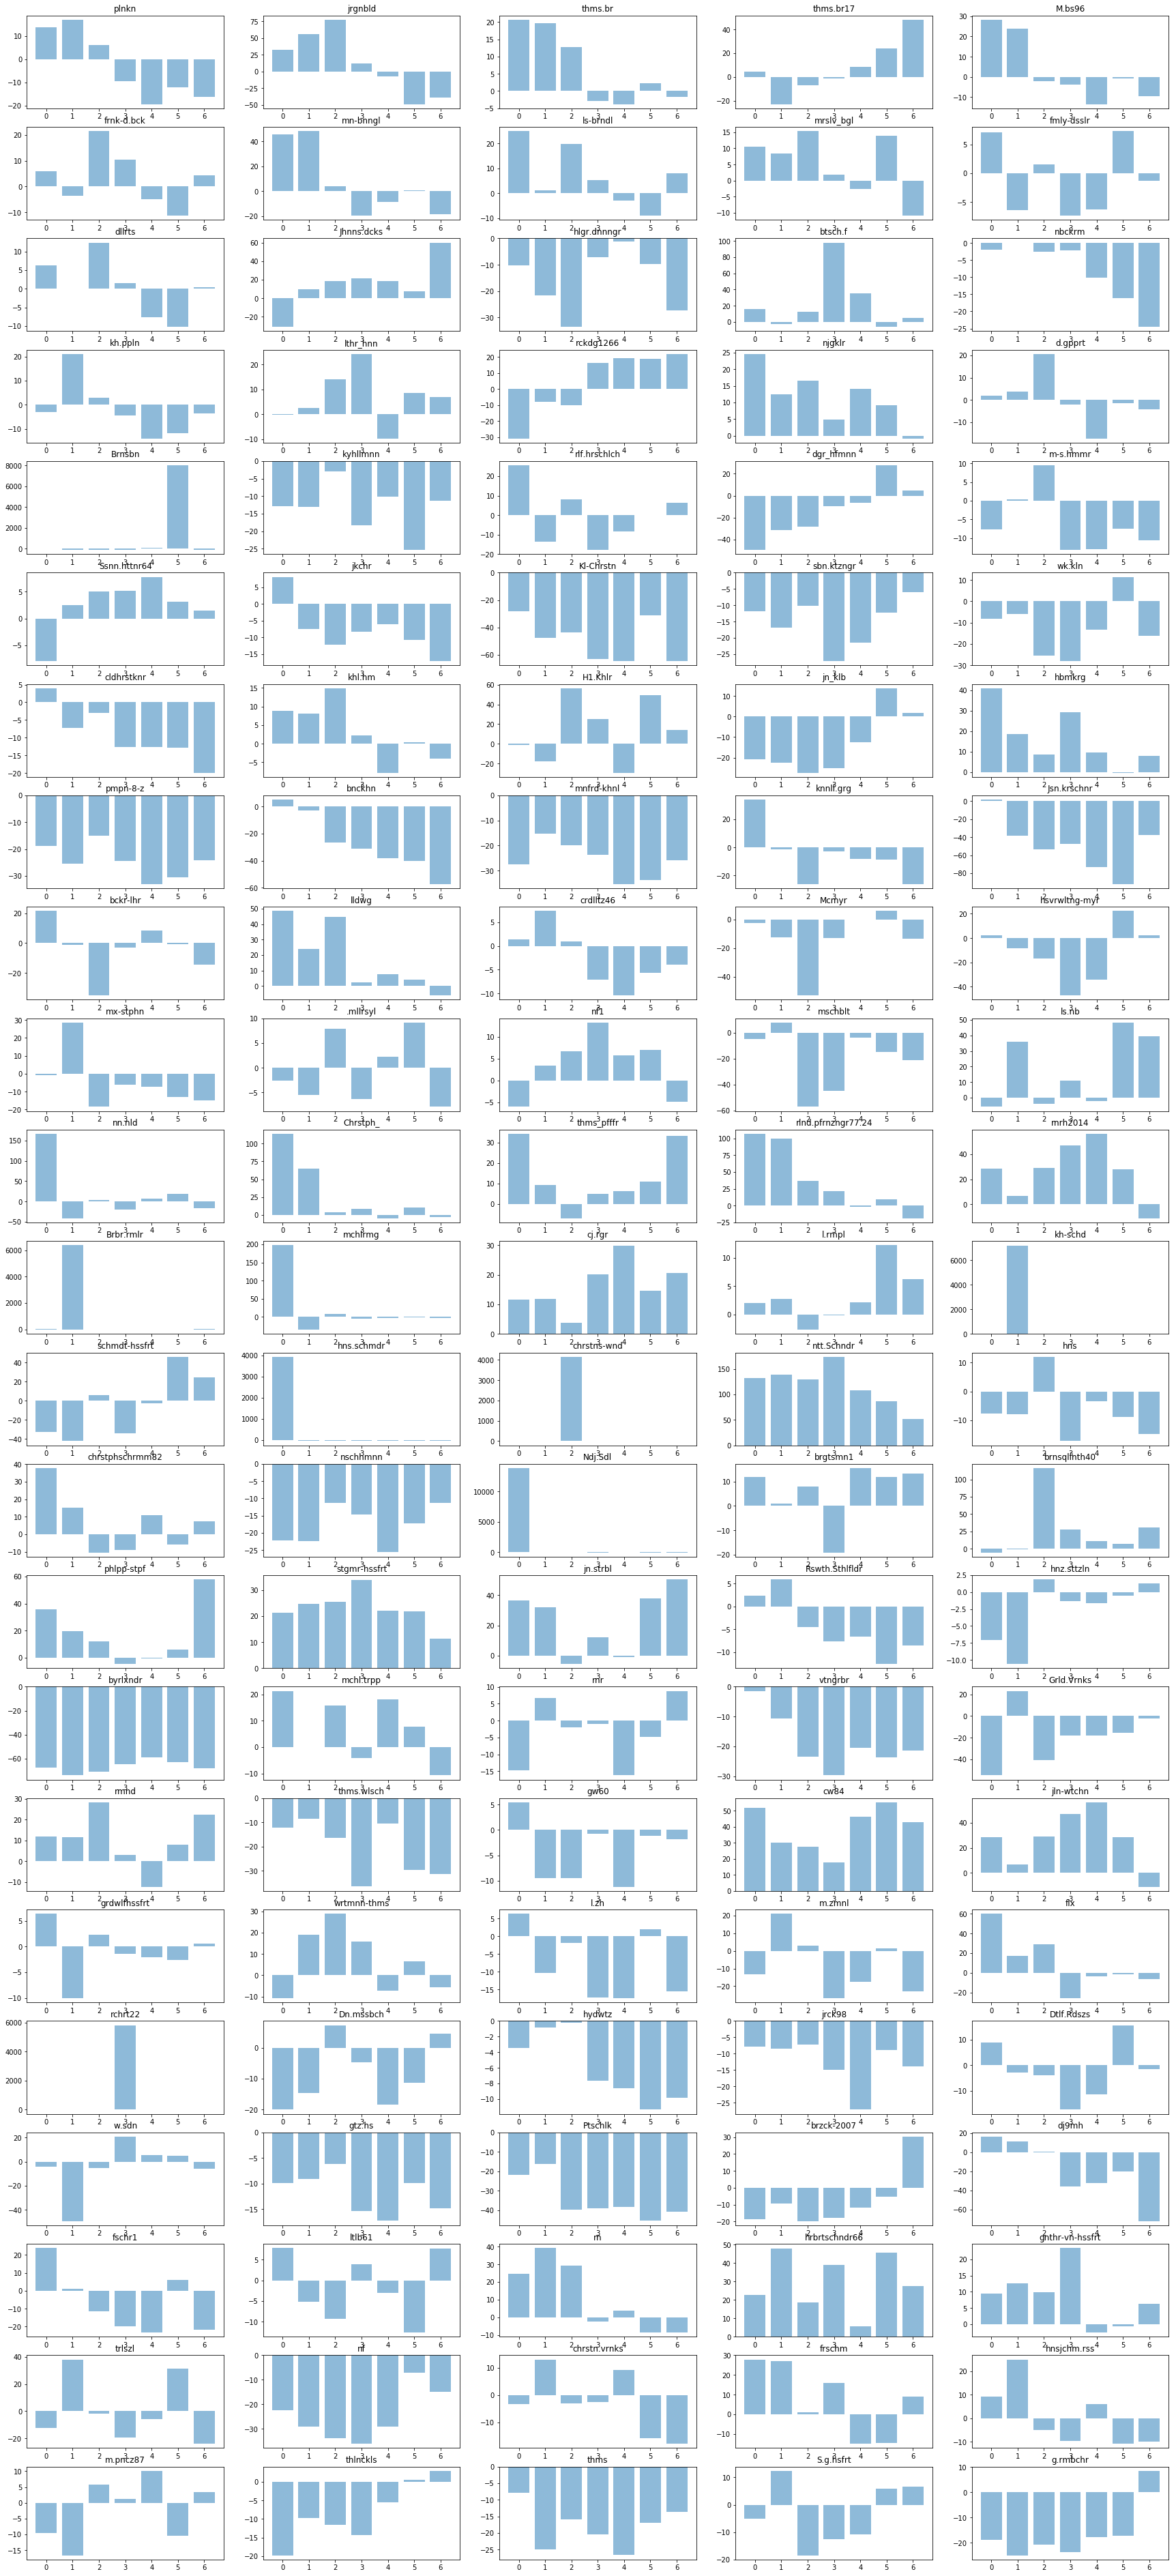

In [158]:
# this is going to take some time
max=len(savings.keys())
fig=plt.figure(figsize=(30,3*max))
i=1
y_pos=np.arange(7) #number of months to display
for user in savings.keys()[:max]:
    plt.subplot(max, 5, i) 
    #plt.plot(savings[user])
    plt.title(user)
    plt.bar(y_pos, (savings[user]/shifted_baseline_jun_dec[user])*100, align='center', alpha=0.5)
    i=i+1
    

In [159]:
fig.savefig("/Users/aer/Desktop/shf_savings.png")